In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('C:\\Users\\vinis\\Desktop\\Programacao\\Ciencia-de-dados\\FreeCodeCamp\\medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [41]:
# Add 'overweight' column
imc = round(df['weight'] / (df['height'] / 100) **2, 2).apply(lambda x: 1 if x > 25 else 0)
df['overweight'] = imc
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [42]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [43]:
df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])

df_cat

,cardio,variable,value
0,0,alco,0
1,1,alco,0
2,1,alco,0
3,1,alco,0
4,0,alco,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [44]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = 'cardio', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])
df_cat


,cardio,variable,value
0,0,alco,0
1,1,alco,0
2,1,alco,0
3,1,alco,0
4,0,alco,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


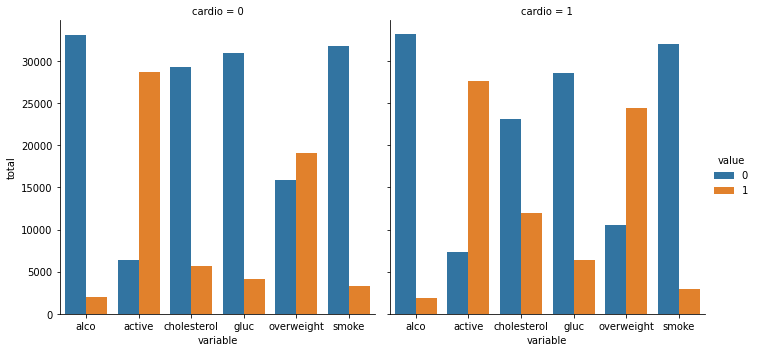

In [45]:
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
    fig = fig.fig

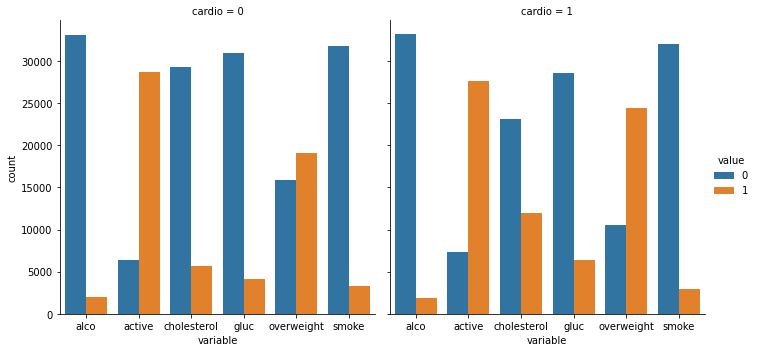

In [46]:
fig = sns.catplot(data=df_cat, kind="count", x = 'variable', hue = "value", col= 'cardio')
fig = fig.fig
fig.savefig('catplot.png')

In [47]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [48]:
#Clean data with diastolic pressure is ever lower than sistolic
df = df[df['ap_lo'] <= df['ap_hi']]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [49]:
# height is less than the 2.5th percentile 
df = df[df['height'] >= df['height'].quantile(0.025)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [50]:
#height is more than the 97.5th percentile
df = df[df['height'] >= df['height'].quantile(0.975)]
df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
14,23,14532,2,181,95.0,130,90,0,0,1,1,1,0,1
62,81,20330,2,187,115.0,130,90,0,0,0,1,1,0,1
74,103,16039,2,180,90.0,140,90,1,1,0,0,0,0,1
76,105,20397,2,188,105.0,120,80,0,0,0,0,1,1,1
94,127,15946,2,185,88.0,133,89,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69913,99862,18748,2,186,101.0,110,80,1,0,0,0,1,0,1
69975,99963,21264,2,182,100.0,120,80,0,0,0,0,1,1,1
69981,99972,17500,2,182,110.0,130,90,1,1,0,0,1,1,1
69986,99978,18198,2,180,78.0,120,80,0,0,0,0,1,0,0


In [51]:
#weight is less than the 2.5th percentile
df = df[df['weight'] <= df['weight'].quantile(0.025)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
503,722,14549,2,182,60.0,110,80,0,0,1,0,0,0,0
2862,4029,20707,1,184,52.0,120,80,0,0,0,0,0,1,0
3237,4561,16072,2,198,61.0,110,70,0,0,0,0,1,1,0
3247,4573,16774,2,180,62.0,150,90,1,0,1,0,0,1,0
4836,6853,14685,2,181,60.0,120,80,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66660,95170,19973,1,180,57.0,120,80,0,0,0,0,1,0,0
66852,95447,18252,2,185,62.0,130,80,0,0,1,1,1,0,0
67492,96370,18743,2,185,57.0,120,80,0,0,0,0,0,0,0
68700,98154,22502,2,180,55.0,130,80,1,0,0,0,1,0,0


In [52]:
#weight is more than the 97.5th percentile
df = df[df['weight'] >= df['weight'].quantile(0.975)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
3247,4573,16774,2,180,62.0,150,90,1,0,1,0,0,1,0
5073,7206,18139,2,184,62.0,120,80,0,0,0,0,1,0,0
20043,28628,23294,2,180,62.0,120,80,1,0,0,0,1,0,0
20750,29622,19079,1,180,62.0,120,60,0,0,0,0,1,0,0
23527,33625,17359,2,181,62.0,120,80,0,0,0,0,0,0,0
25603,36539,17581,2,185,62.0,100,70,0,0,1,0,0,0,0
34384,49127,19793,1,180,62.0,120,80,0,0,0,0,1,0,0
34776,49675,16124,2,182,62.0,120,80,0,0,0,0,0,0,0
44696,63839,16102,2,180,62.0,120,80,0,0,1,0,1,1,0
45970,65660,16038,2,180,62.0,120,80,1,1,1,0,1,0,0


In [53]:
#Create a correlation matrix using Pandas. Need something use the Pandas module "corr".
df_corr = df.corr()
df_corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.057641,-0.144188,0.147605,NaN,0.182481,0.069551,-0.170262,0.203845,-0.064316,0.486127,0.304740,0.235562,NaN
age,0.057641,1.000000,-0.546355,-0.302813,NaN,0.096965,0.355565,-0.019969,0.127991,-0.437238,-0.061381,0.566600,0.285353,NaN
sex,-0.144188,-0.546355,1.000000,0.454260,NaN,-0.005072,0.104447,0.358057,-0.164992,0.416667,0.235702,-0.416667,-0.063564,NaN
height,0.147605,-0.302813,0.454260,1.000000,NaN,-0.107264,-0.049344,0.007807,-0.256968,0.163534,0.704093,-0.163534,-0.166318,NaN
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_hi,0.182481,0.096965,-0.005072,-0.107264,NaN,1.000000,0.521756,0.245145,0.344265,-0.081144,0.222338,0.081144,0.449701,NaN
ap_lo,0.069551,0.355565,0.104447,-0.049344,NaN,0.521756,1.000000,0.355280,0.233874,0.043519,0.233874,0.252413,0.614113,NaN
cholesterol,-0.170262,-0.019969,0.358057,0.007807,NaN,0.245145,0.355280,1.000000,0.227866,0.250640,0.227866,0.053709,0.170697,NaN
gluc,0.203845,0.127991,-0.164992,-0.256968,NaN,0.344265,0.233874,0.227866,1.000000,0.164992,-0.133333,0.235702,0.112367,NaN
smoke,-0.064316,-0.437238,0.416667,0.163534,NaN,-0.081144,0.043519,0.250640,0.164992,1.000000,0.164992,-0.150000,0.063564,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

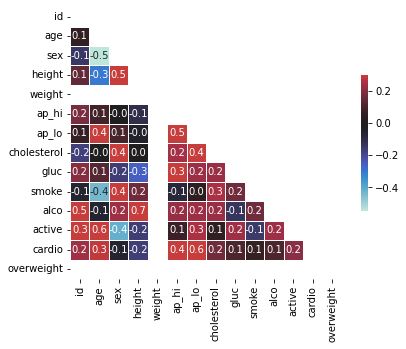

In [84]:
#Create a heatmap with seaborn and matplotlib
plt.subplots(figsize=(7, 5))
mask = np.triu(df_corr)
sns.heatmap(df_corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5, square=True, cbar_kws = {'shrink':0.5},annot=True,  center=0)
plt.show